<a href="https://colab.research.google.com/github/AlineFiori/MVP-Machine_Learning/blob/main/Template_Machine_Learning_Pregnancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning
**Nome:** Aline Fiori Gonçalves

**Matrícula:** 4052025000106

**Dataset:** [Pregnancy](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data?resource=download)

# 1. Descrição do Problema

O conjunto de dados 'Pregnancy' foi compilado com o objetivo de identificar características de saúde em mulheres gestantes que possam indicar risco à gestação. Nele, é possível analisar aspectos cruciais como idade gestacional, pressão arterial, glicemia, frequência cardíaca e a classificação de risco gestacional associada, entre outros.

## 1.1 Hipóteses do Problema

Em relação a idade gestacional 35+ (gestante com 35 anos ou mais):

- Qual o percentual deste grupo de risco na amostra avaliada?

- Qual o percentual de gestação de alto risco?

- Qual a correlação entre a idade materna e o risco gestacional?

## 1.2 Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (idade gestacional, pressáo arterial, glicemia e frequencia cardiaca), o objetivo é prever a qual o risco gestacional.

## 1.3 Atributos do Dataset

O dataset Pregnancy contém, originalmente, 1.014 amostras, 07 colunas, e 03 classificações diferentes de risco gestacional.

Possui cinco atributos:

- ***Age*** (idade em anos da gestante)
- ***SystolicBP*** (valor máximo da pressão arterial em mmHg)
- ***DiastolicBP*** (valor mínimo da pressão arterial em mmHg)
- ***BS (Blood Glicose)*** (níveis de glicose no sangue em termos de concentração molar, mmol/L)
- ***BodyTemp*** (temperatura corporal em Fahrenheit)
- ***HeartRate*** (frequência cardíaca normal em repouso, em batimentos por minuto)
- ***Risk Level*** (nível de intensidade de risco previsto durante a gravidez)

## 1.4 Seleção de Dados

Serão adicionadas duas colunas ao Dataset com a finalidade de refinar a análise dos dados, são elas:
- Idade_35+: classificação da idade gestacional em 1 (>=35) ou 0 (<35)
- Nivel_Risco_Numerico: classificação do nível de risco em 2 (right risk), 1 (mid risk) e 0 (low risk).

# 2. Importação das Bibliotecas
Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização, pré-processamento dos dados e machine learning.

In [1]:
# ==============================================================================
# 1. CONFIGURAÇÃO E BIBLIOTECAS GERAIS
# ==============================================================================

# Ignora warnings para uma saída mais limpa
import warnings
warnings.filterwarnings("ignore")

# Importa bibliotecas para manipulação e visualização de dados
import pandas as pd # Para trabalhar com DataFrames, ideal para dados tabulares
import numpy as np # Para operações numéricas e arrays multidimensionais
import matplotlib.pyplot as plt # Para criar gráficos estáticos
import seaborn as sns # Para criar gráficos estatísticos atraentes e informativos

# ==============================================================================
# 2. FERRAMENTAS DO SCIKIT-LEARN PARA PRÉ-PROCESSAMENTO E MODELAGEM
# ==============================================================================

# Módulo de pré-processamento
from sklearn.preprocessing import StandardScaler # Padroniza features, essencial para modelos como SVM e RNA
from sklearn.pipeline import Pipeline # Permite encadear etapas de processamento e modelagem

# Módulo para seleção e avaliação de modelos
from sklearn.model_selection import (
    train_test_split,    # Divide o dataset em treino e teste
    KFold,               # Implementa validação cruzada k-fold
    cross_val_score,     # Avalia o desempenho do modelo com validação cruzada
    GridSearchCV,        # Otimiza hiperparâmetros buscando a melhor combinação em uma grade
)

# Módulo de métricas de avaliação
from sklearn.metrics import (
    accuracy_score,      # Calcula a acurácia de um modelo
    classification_report, # Gera um relatório detalhado de métricas de classificação
    confusion_matrix,    # Cria a matriz de confusão para analisar erros
)

# ==============================================================================
# 3. ALGORITMOS DE MACHINE LEARNING
# ==============================================================================

# Modelos de Machine Learning
from sklearn.tree import DecisionTreeClassifier # Árvore de Decisão
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors (KNN)
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.svm import SVC # Support Vector Machine (SVM)
from sklearn.neural_network import MLPClassifier # Rede Neural (RNA)
from sklearn.ensemble import (
    RandomForestClassifier,  # Modelo de ensemble que combina várias árvores de decisão
    VotingClassifier         # Combina as previsões de múltiplos modelos para um resultado final
)

# Modelo XGBoost (Gradient Boosting)
from xgboost import XGBClassifier # Otimização de modelos baseados em árvore

# ==============================================================================
# 4. FERRAMENTAS ADICIONAIS
# ==============================================================================

# Utilidades para salvar e carregar modelos
import joblib # Eficiente para salvar modelos treinados


from sklearn.preprocessing import MinMaxScaler





# Módulo para seleção e avaliação de modelos
from sklearn.model_selection import (
    train_test_split,    # Divide o dataset em treino e teste
    KFold,               # Implementa validação cruzada k-fold
    cross_val_score,     # Avalia o desempenho do modelo com validação cruzada
    GridSearchCV,        # Otimiza hiperparâmetros buscando a melhor combinação em uma grade
    RandomizedSearchCV   # Otimiza hiperparâmetros buscando combinações aleatórias
)

# 3. Importação do Dataset

Esta seção consolida todas as etapas de carregamento inicial do dataset Pregnancy.

In [2]:
# 1. Link do GitHub em que o dataset 'Pregnancy' está salvo
url_github = 'https://github.com/AlineFiori/MVP/raw/refs/heads/main/Maternal%20Health%20Risk%20Data%20Set.csv.xls'

In [3]:
# 2. Carregar os dados da url para um data frame pandas
Dataset = pd.read_csv(url_github)

In [4]:
# 3. Primeiras linhas
Dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# 4. Análise Exploratória de Dados

O objetivo desta etapa é entender a estrutura do dataset, identificar padrões, entender as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## 4.1 Estrutura do Dataset

Etapa de configuracão e adequação dos dados, crucial para os próximos passos de analise de dados e Machine Learning. Tem por objetivo verificar:

- Qualidade do Modelo: Modelos de Machine Learning são tão bons quanto os dados com os quais são treinados. Dados mal configurados, com erros, inconsistências ou em formatos inadequados, levarão a modelos com desempenho ruim, previsões imprecisas e decisões erradas.
- Interpretabilidade: Dados bem estruturados e limpos facilitam a compreensão dos padrões e a interpretação dos resultados da análise.
- Eficiência: Trabalhar com dados limpos e adequados torna o processo de desenvolvimento e teste muito mais eficiente, economizando tempo e recursos.
- Consistência: Garante que os dados estejam em um formato consistente para que as ferramentas e algoritmos possam processá-los corretamente.

In [5]:
# 1. Renomear colunas para facilitar o uso
colunas_para_renomear = {
    'Age': 'Idade',
    'SystolicBP': 'Pressao_Sistolica',
    'DiastolicBP': 'Pressao_Diastolica',
    'BS': 'Nivel_Glicose',
    'BodyTemp': 'Temperatura_Corporal',
    'HeartRate': 'Frequencia_Cardiaca',
    'RiskLevel': 'Nivel_Risco'}


Dataset = Dataset.rename(columns=colunas_para_renomear)

print("\nBase com colunas renomeadas - Primeiras 5 linhas:")
print(Dataset.head())


Base com colunas renomeadas - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  
0                  98.0                   86   high risk  
1                  98.0                   70   high risk  
2                 100.0                   80   high risk  
3                  98.0                   70   high risk  
4                  98.0                   76    low risk  


In [6]:
# 2. Criar nova coluna 'Idade_35+' para classificar a idade gestacional
# np.where(condição, valor_se_verdadeiro, valor_se_falso)
Dataset['Idade_35+'] = np.where(Dataset['Idade'] >= 35, 1, 0) # 1 para >=35 anos, 0 para <35 anos

print("\nBase com nova coluna - Primeiras 5 linhas:")
print(Dataset.head())


Base com nova coluna - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  Idade_35+  
0                  98.0                   86   high risk          0  
1                  98.0                   70   high risk          1  
2                 100.0                   80   high risk          0  
3                  98.0                   70   high risk          0  
4                  98.0                   76    low risk          1  


In [7]:
# 3. Verificar todos os valores distintos (sem duplicatas) da coluna Nivel_Risco para classificá-los na sequencia
print("\n--- Valores únicos na coluna 'Nivel_Risco': ---")
print(Dataset['Nivel_Risco'].unique())


--- Valores únicos na coluna 'Nivel_Risco': ---
['high risk' 'low risk' 'mid risk']


In [8]:
# 4. Criar nova coluna 'Nivel_Risco_Numerico' para classificar o nível de risco

def mapear_nivel_risco_para_numerico(row):
    if row['Nivel_Risco'] == 'high risk':
        return 2
    elif row['Nivel_Risco'] == 'mid risk':
        return 1
    elif row['Nivel_Risco'] == 'low risk': # Correção da sintaxe aqui
        return 0
    else: # Para qualquer outro valor inesperado
        return np.nan # Retorna Not a Number para valores não mapeados

# Aplicar a função ao DataFrame e atribuir à nova coluna 'Nivel_Risco_Numerico'
Dataset['Nivel_Risco_Numerico'] = Dataset.apply(mapear_nivel_risco_para_numerico, axis=1)

print("\nBase com nova coluna - Primeiras 5 linhas:")
print(Dataset.head())


Base com nova coluna - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  Idade_35+  \
0                  98.0                   86   high risk          0   
1                  98.0                   70   high risk          1   
2                 100.0                   80   high risk          0   
3                  98.0                   70   high risk          0   
4                  98.0                   76    low risk          1   

   Nivel_Risco_Numerico  
0                     2  
1                     2  
2                     2  
3                     2  
4 

In [9]:
# 5. Verificar todos os valores distintos (sem duplicatas) da coluna Nivel_Risco_Numerico para checar o resultado da classificação
print("\n--- Valores únicos na coluna 'Nivel_Risco': ---")
print(Dataset['Nivel_Risco_Numerico'].unique())


--- Valores únicos na coluna 'Nivel_Risco': ---
[2 0 1]


In [10]:
# 6. Visão geral: total de linhas e colunas
print(f"Total de instâncias (linhas): {len(Dataset)}")
print(f"Total de colunas: {len(Dataset.columns)}")

Total de instâncias (linhas): 1014
Total de colunas: 9


In [11]:
# 7. Análise de tipos de dados e valores nao nulos
print("\nInformações sobre os tipos de dados e valores não nulos")
Dataset.info()


Informações sobre os tipos de dados e valores não nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Idade                 1014 non-null   int64  
 1   Pressao_Sistolica     1014 non-null   int64  
 2   Pressao_Diastolica    1014 non-null   int64  
 3   Nivel_Glicose         1014 non-null   float64
 4   Temperatura_Corporal  1014 non-null   float64
 5   Frequencia_Cardiaca   1014 non-null   int64  
 6   Nivel_Risco           1014 non-null   object 
 7   Idade_35+             1014 non-null   int64  
 8   Nivel_Risco_Numerico  1014 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 71.4+ KB


In [12]:
# 8. Verificação de valores ausentes
print("\nVerificação de Valores Ausentes")
print(Dataset.isnull().sum())


Verificação de Valores Ausentes
Idade                   0
Pressao_Sistolica       0
Pressao_Diastolica      0
Nivel_Glicose           0
Temperatura_Corporal    0
Frequencia_Cardiaca     0
Nivel_Risco             0
Idade_35+               0
Nivel_Risco_Numerico    0
dtype: int64


## 4.2 Estatística Descritiva

A etapa de estatística descritiva serve para resumir e organizar os principais aspectos de um conjunto de dados, tornando-o mais compreensível.

- Identificar Problemas e Anomalias: Ajuda a detectar valores discrepantes (outliers), erros de entrada, distribuições inesperadas (muito concentradas ou muito espalhadas) ou dados ausentes que precisam ser tratados.

- Informar Próximos Passos: As descobertas da estatística descritiva guiam as decisões nas etapas futuras, como:

  Qual tipo de pré-processamento usar (padronização, normalização).

  Como lidar com valores ausentes ou extremos.

  Quais transformações podem ser necessárias para certas variáveis.

- Obter Insights Iniciais: Permite identificar tendências, padrões ou relações preliminares entre as variáveis antes de aplicar modelos mais complexos.

- Comunicar Características dos Dados: Facilita a comunicação das propriedades do dataset para outras pessoas, sem que elas precisem examinar cada ponto de dado individualmente.

Exemplos de estatísticas descritivas comuns:

- Medidas de Tendência Central: Média (valor médio), Mediana (valor do meio), Moda (valor mais frequente).

- Medidas de Dispersão: Desvio Padrão (quão espalhados os dados estão em relação à média), Variância, Amplitude (diferença entre máximo e mínimo).

- Medidas de Posição: Quartis (valores que dividem o dataset em quatro partes iguais), Mínimo e Máximo.

In [13]:
# 1. Estatística Descritiva - Geral
print("\nEstatísticas descritivas das colunas numéricas")
print(Dataset.describe().T) # .T para transpor e facilitar a leitura, prefiro a visualização desta forma


Estatísticas descritivas das colunas numéricas
                       count        mean        std   min    25%    50%  \
Idade                 1014.0   29.871795  13.474386  10.0   19.0   26.0   
Pressao_Sistolica     1014.0  113.198225  18.403913  70.0  100.0  120.0   
Pressao_Diastolica    1014.0   76.460552  13.885796  49.0   65.0   80.0   
Nivel_Glicose         1014.0    8.725986   3.293532   6.0    6.9    7.5   
Temperatura_Corporal  1014.0   98.665089   1.371384  98.0   98.0   98.0   
Frequencia_Cardiaca   1014.0   74.301775   8.088702   7.0   70.0   76.0   
Idade_35+             1014.0    0.313609   0.464189   0.0    0.0    0.0   
Nivel_Risco_Numerico  1014.0    0.867850   0.807353   0.0    0.0    1.0   

                        75%    max  
Idade                  39.0   70.0  
Pressao_Sistolica     120.0  160.0  
Pressao_Diastolica     90.0  100.0  
Nivel_Glicose           8.0   19.0  
Temperatura_Corporal   98.0  103.0  
Frequencia_Cardiaca    80.0   90.0  
Idade_35+        

In [14]:
# 2. Estatísticas descritivas agrupadas por tipo de risco
Dataset.groupby('Nivel_Risco').describe()

Idade                                                      \
             count       mean        std   min   25%   50%   75%   max   
Nivel_Risco                                                              
high risk    272.0  36.216912  13.032206  12.0  25.0  35.0  48.0  65.0   
low risk     406.0  26.869458  13.121661  10.0  17.0  22.0  32.0  70.0   
mid risk     336.0  28.363095  12.552660  10.0  19.0  25.0  32.0  60.0   

            Pressao_Sistolica              ... Idade_35+       \
                        count        mean  ...       75%  max   
Nivel_Risco                                ...                  
high risk               272.0  124.194853  ...       1.0  1.0   
low risk                406.0  105.866995  ...       0.0  1.0   
mid risk                336.0  113.154762  ...       0.0  1.0   

            Nivel_Risco_Numerico                                     
                           count mean  std  min  25%  50%  75%  max  
Nivel_Risco                                                          
high risk                  272.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
low risk                   406.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mid risk                   336.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[3 rows x 64 columns]

**Descrição dos Campos de Estatística Descritiva**

count = contagem de registros do dataset

mean = média

std = desvio padrão

min = valor mínimo da categoria

25% = valor de 25% dos registros da categoria

75% = valor de 75% dos registros da categoria

max = valor máximo da categoria

In [15]:
# 3. Calcular o % de gestantes com idade >= 35 anos

# Calcular a contagem de valores para 'Idade_35+' e normalizar para obter proporções
proportions_idade2 = Dataset['Idade_35+'].value_counts(normalize=True)

# Obter o percentual de '1' (gestantes com 35+ anos)
percent_idade2_equals_1 = proportions_idade2.get(1, 0) * 100 # .get(1, 0) para lidar se não houver '1's

print(f"Contagem de valores para 'Idade_35+':")
print(Dataset['Idade_35+'].value_counts())

print(f"\nPercentual de gestantes com 35 anos ou mais (Idade_35+ = 1): {percent_idade2_equals_1:.2f}%")

# Se quiser ver todas as proporções:
print("\nProporções de 'Idade_35+':")
print(proportions_idade2)

Contagem de valores para 'Idade_35+':
Idade_35+
0    696
1    318
Name: count, dtype: int64

Percentual de gestantes com 35 anos ou mais (Idade_35+ = 1): 31.36%

Proporções de 'Idade_35+':
Idade_35+
0    0.686391
1    0.313609
Name: proportion, dtype: float64


## 4.3 Análise de Variáveis Numéricas e Categóricas

A análise de variáveis numéricas e categóricas é fundamental para extrair insights iniciais, validar hipóteses e guiar as próximas etapas do desenvolvimento do projeto. Entender a natureza e o comportamento de cada tipo de variável permite construir uma base sólida para modelos mais complexos e decisões estratégicas.

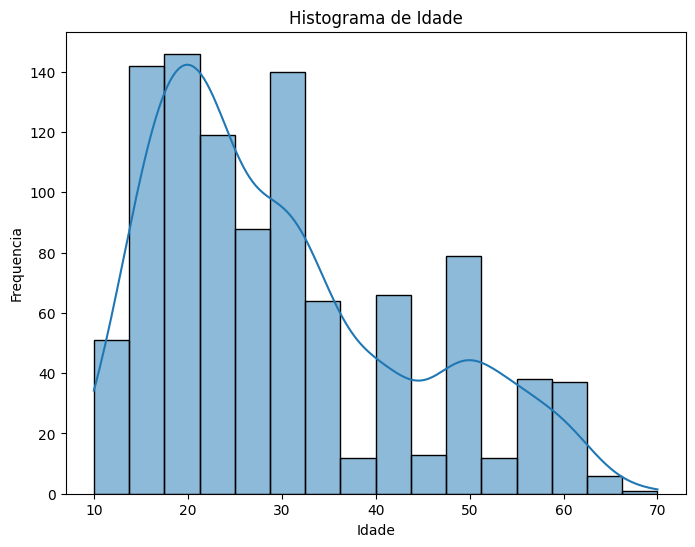

In [16]:
# 1. Análise da frequencia de distribuição de idade no dataset

plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(Dataset['Idade'], kde=True)
plt.title('Histograma de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.show()

**Gráfico: Histograma de Idade**

O gráfico mostra que há maior volume de dados de gestantes com idade inferior a 35 anos.

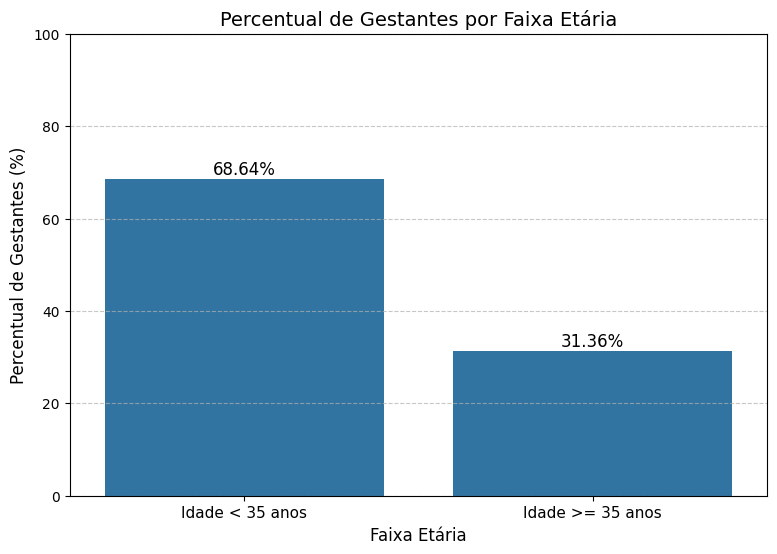

In [17]:
# 2. Análise do % de idade gestacional 35+

# Calcular a contagem de valores para 'Idade_35+' e normalizar para obter percentuais
proportions_idade35_plus = Dataset['Idade_35+'].value_counts(normalize=True) * 100

# Preparar os dados para o gráfico de barras
plot_data = pd.DataFrame({
    'Grupo Idade': ['Idade < 35 anos', 'Idade >= 35 anos'], # Rótulos claros para o gráfico
    'Percentual': [proportions_idade35_plus.get(0, 0), proportions_idade35_plus.get(1, 0)]
})

# Criar o gráfico de barras
plt.figure(figsize=(9, 6)) # Aumentar ligeiramente o tamanho para melhor visualização
sns.barplot(x='Grupo Idade', y='Percentual', data=plot_data)
            #palette='viridis') # 'viridis' é uma boa paleta de cores

# Adicionar rótulos de percentual nas barras para clareza
for index, row in plot_data.iterrows():
    plt.text(index, row.Percentual, f'{row.Percentual:.2f}%',
             color='black', ha="center", va='bottom', fontsize=12)

plt.title('Percentual de Gestantes por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Percentual de Gestantes (%)', fontsize=12)
plt.ylim(0, 100) # Garantir que o eixo Y vá de 0 a 100%
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adicionar grade para facilitar a leitura
plt.xticks(fontsize=11)

# Mostrar o gráfico
plt.show()

**Gráfico: Percentual de Gestantes por Faixa Etária**

Confirmando a análise do gráfico anterior, que evidencia que o maior volume de dados são de gestantes com idade inferior a 35 anos, do total de dados da base:
- 68,64% dos dados são de gestantes com idade inferior a 35 anos
- 31,36% dos dados são de gestantes com idade superior ou igual a 35 anos.

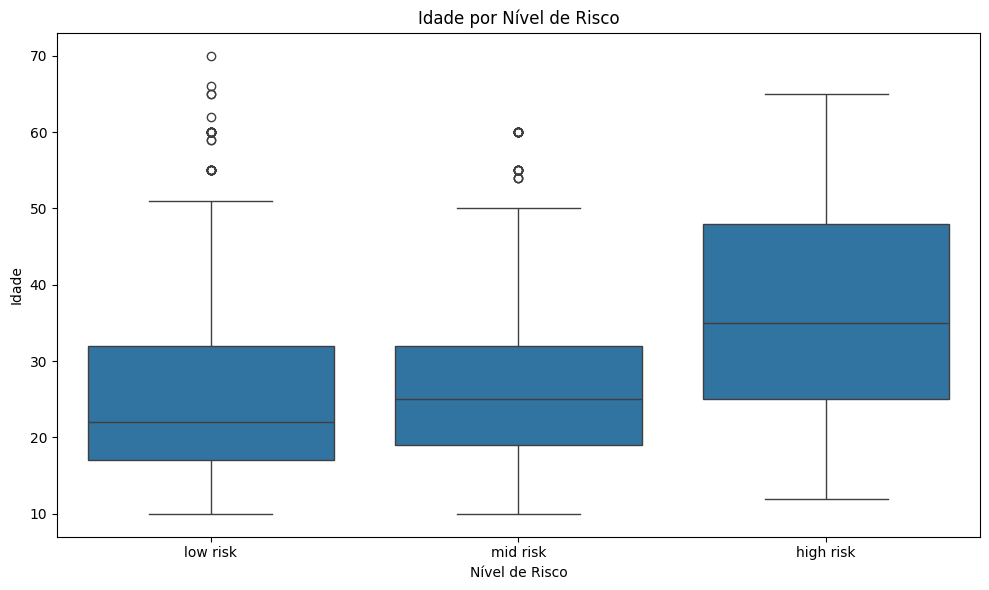

In [18]:
# 3. Análise da idade em relação ao risco gestacional
# Gráfico Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Nivel_Risco', y='Idade', data=Dataset, order=['low risk', 'mid risk', 'high risk'])

# Correcting the title and labels
plt.title('Idade por Nível de Risco')
plt.xlabel('Nível de Risco')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

**Gráfico: Idade por Nível de Risco**

Este gráfico demonstra que temos 03 categorias de risco:
- Low Risk
- Mid Risk
- High Risk

Sendo o maior risco gestacional (Hight Risk) concentrado em idades >= 35 anos.

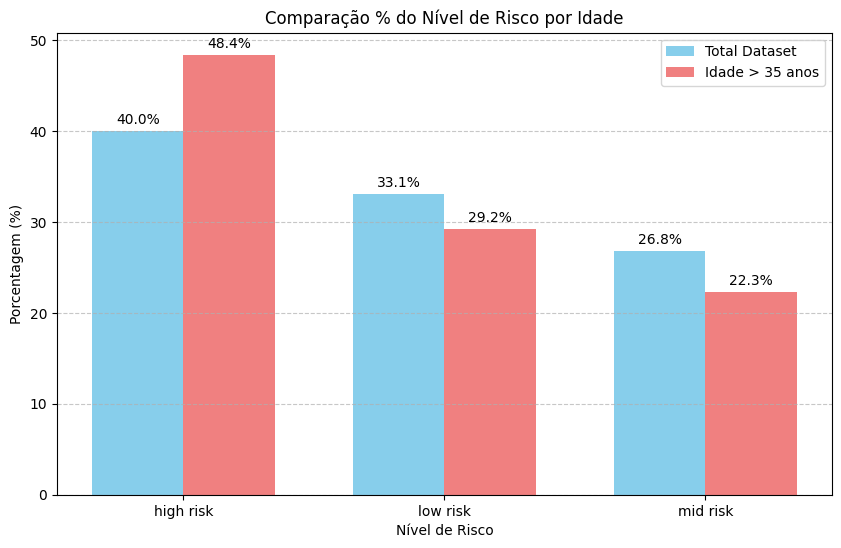

In [19]:
# 4. Análise do % de nível de risco por idade

# Gráfico Barras

# 1. Calcular os percentuais para o dataset total
percent_total = Dataset['Nivel_Risco'].value_counts(normalize=True) * 100
# Transformar em DataFrame para facilitar a manipulação
percent_total_df = percent_total.reset_index()
percent_total_df.columns = ['Nivel_Risco', 'Percentage']

# 2. Filtrar o DataFrame para idade maior que 35
df_age_gt_35 = Dataset[Dataset['Idade'] >= 35]

# 3. Calcular os percentuais para o dataset filtrado (idade > 35)
percent_age_gt_35 = df_age_gt_35['Nivel_Risco'].value_counts(normalize=True) * 100
# Transformar em DataFrame
percent_age_gt_35_df = percent_age_gt_35.reset_index()
percent_age_gt_35_df.columns = ['Nivel_Risco', 'Percentage']

# Obter os níveis de risco únicos para os rótulos do eixo X
risk_levels = sorted(percent_total_df['Nivel_Risco'].unique())

# Configurações para o gráfico
width = 0.35 # Largura das barras
x_pos = range(len(risk_levels)) # Posições para as barras no eixo X

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar as barras para o dataset total
bars_total = ax.bar([p - width/2 for p in x_pos], percent_total_df['Percentage'], width, label='Total Dataset', color='skyblue')

# Plotar as barras para o dataset filtrado (idade > 35)
bars_age_gt_35 = ax.bar([p + width/2 for p in x_pos], percent_age_gt_35_df['Percentage'], width, label='Idade > 35 anos', color='lightcoral')

# Adicionar rótulos, título e legenda
ax.set_xlabel('Nível de Risco')
ax.set_ylabel('Porcentagem (%)')
ax.set_title('Comparação % do Nível de Risco por Idade')
ax.set_xticks(x_pos)
ax.set_xticklabels(risk_levels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores percentuais nas barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_total)
autolabel(bars_age_gt_35)


# Mostrar o gráfico
plt.show()


**Gráfico: Comparação % do Nível de Risco por Idade**

Este gráfico de barras evidencia que temos 03 categorias de riscos:
- High Risk
- Mid Risk
- Low Risk

Sendo a categoria de maior risco (Righ Risk) a que tem maior quantidade de gestantes com idade >= 35 anos, representando 48,4%.

## 4.4 Matriz de Correlação

É uma ferramenta de suma importância, quase indispensável, para compreender as relações entre as variáveis numéricas do conjunto de dados. Ela serve como um mapa rápido e eficiente para identificar padrões, dependências e possíveis problemas antes de mergulhar em análises mais complexas ou na construção de modelos.As correlações positivas indicam que as variáveis tendem a se mover na mesma direção.

As correlações negativas indicam que elas tendem a se mover em direções opostas.

A força da correlação (o quão perto de 1 ou -1 o valor está) indica o quão forte é essa relação linear.

In [20]:
# 1. Matriz de Correlação

# Definir colunas numéricas
numeric_cols = [
    'Idade',
    'Pressao_Sistolica',
    'Pressao_Diastolica',
    'Nivel_Glicose',
    'Temperatura_Corporal',
    'Frequencia_Cardiaca',
    'Idade_35+',
    'Nivel_Risco_Numerico'
]


# Calcular a matriz de correlação
matriz_correlacao = Dataset[numeric_cols].corr()

# Mostrar resultado da matriz de correlação
print("\n--- Matriz de Correlação das Características Numéricas ---")
print(matriz_correlacao)



--- Matriz de Correlação das Características Numéricas ---
                         Idade  Pressao_Sistolica  Pressao_Diastolica  \
Idade                 1.000000           0.416045            0.398026   
Pressao_Sistolica     0.416045           1.000000            0.787006   
Pressao_Diastolica    0.398026           0.787006            1.000000   
Nivel_Glicose         0.473284           0.425172            0.423824   
Temperatura_Corporal -0.255323          -0.286616           -0.257538   
Frequencia_Cardiaca   0.079798          -0.023108           -0.046151   
Idade_35+             0.858554           0.326090            0.347741   
Nivel_Risco_Numerico  0.267225           0.396473            0.346649   

                      Nivel_Glicose  Temperatura_Corporal  \
Idade                      0.473284             -0.255323   
Pressao_Sistolica          0.425172             -0.286616   
Pressao_Diastolica         0.423824             -0.257538   
Nivel_Glicose              1.000000   

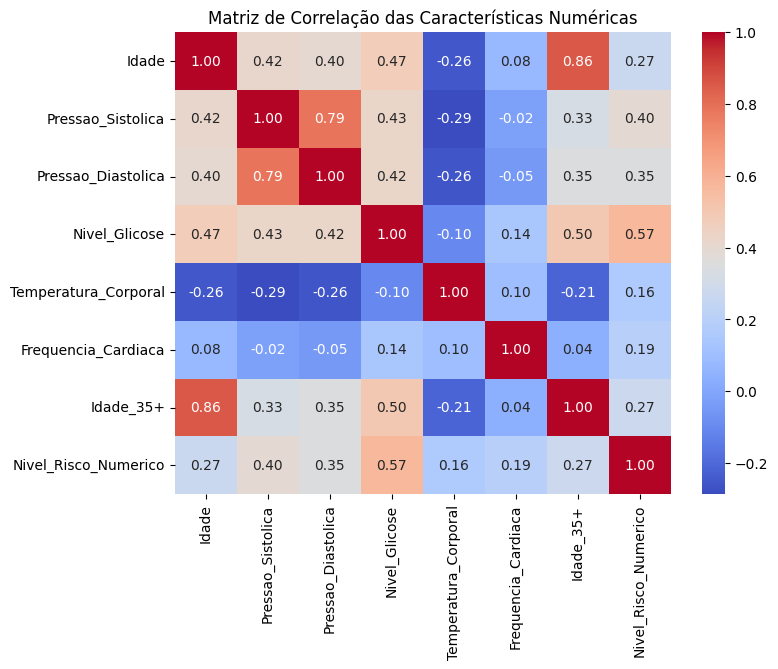

In [21]:
# 2. Gerar e exibir o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas')
plt.show()

**Análise da Matriz de Correlação das Características Numéricas**

1. Aspectos mais relevantes da matriz:

- Nivel_Glicose (0.569942): Esta é a correlação positiva mais forte com o nível de risco. Indica que quanto maior o Nível de Glicose, maior o risco gestacional.

- Pressao_Sistolica (0.396473): Correlação positiva moderada. Indica que quanto maior a Pressão Sistólica, maior o risco gestacional.

- Pressao_Diastolica (0.346649): Correlação positiva moderada. Indica que quanto maior a Pressão Diastólica, maior o risco gestacional.

- Idade_35+ (0.271375): Correlação positiva moderada a fraca. Sugere que estar no grupo 35+ está associado a um maior risco gestacional, porém a idade deve ser associada a outros fatores para que aumente sua correlação

- Frequencia_Cardiaca (0.194312): Correlação positiva fraca. Sugere que uma Frequência Cardíaca mais alta está associada a um risco gestacional ligeiramente maior.

- Temperatura_Corporal (0.163984): Correlação positiva muito fraca. Indica uma associação muito branda entre temperatura corporal mais alta e maior risco.


2. Correlação Entre as Features (Multicolinearidade):

- Idade e Idade_35+: 0.858554

- Pressao_Sistolica e Pressao_Diastolica: 0.787006

Estas são correlações muito fortes e positivas. Em alguns modelos (como regressão linear), deve ser levado em consideração usar apenas uma delas para evitar redundância, mas em outros (como Random Forests), isso é menos problemático.


Matriz de Correlação para Idade >= 35 e Risco Gestacional:
                         Idade  Nivel_Risco_Numerico
Idade                 1.000000             -0.117465
Nivel_Risco_Numerico -0.117465              1.000000


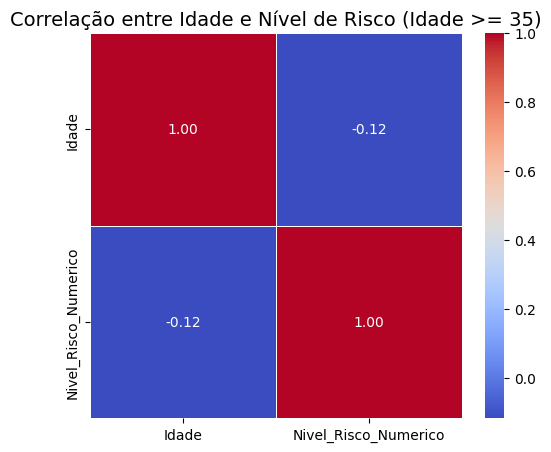

In [22]:
# 3. Matriz de correlação de idade x risco gestacional

# Filtrar o DataFrame para incluir apenas pessoas com idade maior ou igual a 35
df_idade_maior_35 = Dataset[Dataset['Idade'] >= 35].copy() # .copy() para evitar SettingWithCopyWarning

# Selecionar as colunas para a matriz de correlação
colunas_para_correlacao_df = df_idade_maior_35[['Idade', 'Nivel_Risco_Numerico']]

# Calcular a matriz de correlação
matriz_correlacao_idade_risco = colunas_para_correlacao_df.corr()

print("\nMatriz de Correlação para Idade >= 35 e Risco Gestacional:")
print(matriz_correlacao_idade_risco)

# --- Gerar o Heatmap da Matriz de Correlação ---
plt.figure(figsize=(6, 5)) # Define o tamanho da figura
sns.heatmap(matriz_correlacao_idade_risco,
            annot=True,      # Mostra os valores de correlação no mapa
            cmap='coolwarm', # Escolhe um mapa de cores (coolwarm é bom para correlação)
            fmt=".2f",       # Formato dos números (2 casas decimais)
            linewidths=.5)   # Largura das linhas entre as células

plt.title('Correlação entre Idade e Nível de Risco (Idade >= 35)', fontsize=14)
plt.show()

**Análise da Matriz de Correlação Idade 35+ e Risco Gestacional**

Essa matriz mostra uma correlação fraca entre idade gestacional 35+ e risco gestacional. Com isso é possível inferir que apesar de a idade gestacional ser um fator importante, ela precisa ser associada a outros fatores de saúde para determinar o risco gestacional.

#5. Pré-Processamento

##5.1 Seleção do Tipo de Problema

In [23]:
# Defina a seed para reprodutibilidade
SEED = 7

# ==============================================================================
# 1. ADAPTAÇÃO PARA O PROBLEMA DE CLASSIFICAÇÃO
# ==============================================================================

# Selecione o tipo de problema: 'classificacao'
PROBLEM_TYPE = "classificacao"

# Defina as features e o target conforme o seu problema
if PROBLEM_TYPE == "classificacao":
    # O seu target é o 'Nivel_Risco_Numerico'
    target = "Nivel_Risco_Numerico"
    # Suas features são as 7 colunas que você utilizou
    features = ['Idade', 'Pressao_Sistolica', 'Pressao_Diastolica', 'Nivel_Glicose', 'Temperatura_Corporal', 'Frequencia_Cardiaca', 'Idade_35+']
else:
    raise ValueError("PROBLEM_TYPE inválido para este trabalho.")

print("PROBLEM_TYPE:", PROBLEM_TYPE)
print("Target:", target)
print("N features:", len(features))



PROBLEM_TYPE: classificacao
Target: Nivel_Risco_Numerico
N features: 7


##5.2 Treino e Teste

Esta etapa consiste em separar o dataset em duas partes, sendo um conjunto de treino e outro de teste.

- O conjunto de treino é usado para "ensinar" o        modelo a encontrar padrões nos dados.
- O conjunto de teste é um conjunto de dados "invisível" que o modelo nunca viu durante o treinamento. Ele é usado para simular como o      modelo se comportaria com novos dados do mundo real, dando uma estimativa imparcial de sua capacidade de generalização.

In [27]:
# Divida os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=7,
    stratify=y
)

# Imprimir as dimensões dos conjuntos para verificar
print(f"Dimensão total do Dataset: {Dataset.shape}")
print(f"Dimensão de X (features): {X.shape}")
print(f"Dimensão de y (target): {y.shape}")
print("-" * 40)
print(f"Dimensão do conjunto de treino (X_train): {X_train.shape}")
print(f"Dimensão do conjunto de teste (X_test): {X_test.shape}")
print(f"Dimensão do target de treino (y_train): {y_train.shape}")
print(f"Dimensão do target de teste (y_test): {y_test.shape}")
print("-" * 40)
print("Distribuição do Nivel_Risco no Dataset original:")
print(y.value_counts(normalize=True))
print("\nDistribuição do Nivel_Risco no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição do Nivel_Risco no conjunto de teste:")
print(y_test.value_counts(normalize=True))


NameError: name 'X' is not defined

###Avaliação do Resultado

A distribuição das classes de risco foi mantida de forma praticamente idêntica nos conjuntos de treino e teste.

A diferença percentual entre os conjuntos é mínima, o que confirma que o stratify funcionou como esperado. Isso garante que:

Representatividade: Os conjuntos de treino e teste são representativos do conjunto de dados original.

Validação Justa: Seu modelo será treinado e testado em uma amostra que reflete a realidade do problema, evitando que a performance seja enviesada por uma distribuição de classes diferente.

##5.3 Padronização dos Dados

 A padronização dos dados é um processo de pré-processamento de dados em Machine Learning que transforma as features para que elas tenham as mesmas propriedades estatísticas. O objetivo é que, após a padronização, os dados de cada feature tenham a média igual a zero e o desvio padrão igual a um.

É crucial para o desempenho de diversos algoritmos de Machine Learning, especialmente aqueles que são sensíveis à escala das variáveis.

In [ ]:
print("Shape dos dados de treino (sem padronizar):", X_train.shape)
print("Shape dos dados de teste (sem padronizar):", X_test.shape)

# Instanciar o StandardScaler
# O StandardScaler remove a média (0) e escala para a unidade de variância (1)
scaler = StandardScaler()

# Ajustar o scaler APENAS nos dados de treino
# O .fit() calcula a média e o desvio padrão com base somente no conjunto de treino.
scaler.fit(X_train)

# Transformar os dados de treino e teste
# O .transform() aplica a padronização usando as estatísticas aprendidas no passo anterior.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Os dados agora estão padronizados e prontos para o treino dos modelos sensíveis à escala.
print("\nShape dos dados de treino (padronizados):", X_train_scaled.shape)
print("Shape dos dados de teste (padronizados):", X_test_scaled.shape)
print("\nPrimeiras 5 linhas do X_train padronizado:")
print(pd.DataFrame(X_train_scaled, columns=features).head())


##5.4 Normalização dos Dados

A normalização de dados é uma técnica de pré-processamento que ajusta a escala das features para um intervalo comum, geralmente entre 0 e 1.

O principal objetivo é garantir que todas as variáveis contribuam de forma proporcional para o modelo, evitando que uma feature com valores muito grandes domine o processo de treinamento.

In [ ]:
print("Shape dos dados de treino (sem normalizar):", X_train.shape)
print("Shape dos dados de teste (sem normalizar):", X_test.shape)

# Instanciar o MinMaxScaler
# O MinMaxScaler normaliza os dados para o intervalo padrão [0, 1].
min_max_scaler = MinMaxScaler()

# Ajustar o scaler APENAS nos dados de treino
# O .fit() calcula os valores mínimo e máximo com base apenas no conjunto de treino.
min_max_scaler.fit(X_train)

# Transformar os dados de treino e teste
# O .transform() aplica a normalização usando as estatísticas aprendidas no passo anterior.
X_train_normalized = min_max_scaler.transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

# Os dados agora estão normalizados e prontos para o treino dos modelos sensíveis à escala.
print("\nShape dos dados de treino (normalizados):", X_train_normalized.shape)
print("Shape dos dados de teste (normalizados):", X_test_normalized.shape)
print("\nPrimeiras 5 linhas do X_train normalizado:")
print(pd.DataFrame(X_train_normalized, columns=features).head())

# 6. Machine Learning

Machine Learning (aprendizado de maquina) é um campo da Inteligência Artificial que permite que os computadores aprendam a partir de dados, sem serem explicitamente programados para cada tarefa.

O objetivo é criar um modelo que, ao receber novos dados (de uma paciente/gestante que ele nunca viu, por exemplo), seja capaz de fazer uma previsão ou tomar uma decisão com base nos padrões que aprendeu.

##6.1 Cross Validation - Com dados originais
Comparar o desempenho de vários modelos de machine learning para encontrar o melhor para o problema apresentado.

In [ ]:
# Definindo uma seed para garantir a reprodutibilidade.
np.random.seed(7)

# Preparando a lista de modelos.
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))
models.append(('RNA', MLPClassifier(max_iter=1000)))

# Criar o objeto de validação cruzada (KFold).
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Listas para armazenar os resultados de acurácia e os nomes dos modelos.
results = []
names = []
scoring = 'accuracy'

# Avaliando cada modelo usando validação cruzada com os dados originais.
for name, model in models:
    try:
        # AVALIAÇÃO COM DADOS ORIGINAIS (SEM PADRONIZAÇÃO)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

        results.append(cv_results)
        names.append(name)
        msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
        print(msg)
    except Exception as e:
        print(f"Erro ao avaliar o modelo {name}: {e}")

# ==============================================================================
# 2. VISUALIZAÇÃO E ANÁLISE DOS RESULTADOS
# ==============================================================================

# Criar um DataFrame a partir dos resultados para facilitar a visualização com Seaborn.
df_results = pd.DataFrame(columns=['Acurácia', 'Modelo'])
for i in range(len(names)):
    model_data = pd.DataFrame({
        'Acurácia': results[i],
        'Modelo': names[i]
    })
    df_results = pd.concat([df_results, model_data], ignore_index=True)

# Gerar o box plot e o stripplot.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Modelo', y='Acurácia', data=df_results)
sns.stripplot(x='Modelo', y='Acurácia', data=df_results, color='black', size=5, jitter=True, alpha=0.5)

plt.title('Comparação de Desempenho dos Modelos (Sem Padronização)', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##6.2 Cross Validation - Dados Padronizados

In [ ]:
# Definindo uma seed para garantir a reprodutibilidade.
np.random.seed(7)

# Preparando a lista de modelos dentro de pipelines padronizados
pipelines_padronizados = []
pipelines_padronizados.append(('KNN-Pad', Pipeline([('padronizador', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines_padronizados.append(('CART-Pad', Pipeline([('padronizador', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines_padronizados.append(('NB-Pad', Pipeline([('padronizador', StandardScaler()), ('NB', GaussianNB())])))
pipelines_padronizados.append(('SVM-Pad', Pipeline([('padronizador', StandardScaler()), ('SVM', SVC())])))
pipelines_padronizados.append(('XGBoost-Pad', Pipeline([('padronizador', StandardScaler()), ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])))
pipelines_padronizados.append(('RNA-Pad', Pipeline([('padronizador', StandardScaler()), ('RNA', MLPClassifier(max_iter=1000))])))

# Criar o objeto de validação cruzada (KFold).
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Listas para armazenar os resultados e nomes
results_padronizados = []
names_padronizados = []
scoring = 'accuracy'

# Avaliando cada pipeline usando validação cruzada.
print("Validação cruzada com dados padronizados...")
for name, pipeline in pipelines_padronizados:
    try:
        cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
        results_padronizados.append(cv_results)
        names_padronizados.append(name)
        msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
        print(msg)
    except Exception as e:
        print(f"Erro ao avaliar o modelo {name}: {e}")



# Gerar o box plot e o stripplot.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Modelo', y='Acurácia', data=df_results)
sns.stripplot(x='Modelo', y='Acurácia', data=df_results, color='black', size=5, jitter=True, alpha=0.5)

plt.title('Comparação de Desempenho dos Modelos (Dados Padronização)', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##6.3 Cross Validation - Dados Normalizados

In [ ]:
# Definindo uma seed para garantir a reprodutibilidade.
np.random.seed(7)

# Preparando a lista de modelos dentro de pipelines normalizados
pipelines_normalizados = []
pipelines_normalizados.append(('KNN-Norm', Pipeline([('normalizer', MinMaxScaler()), ('KNN', KNeighborsClassifier())])))
pipelines_normalizados.append(('CART-Norm', Pipeline([('normalizer', MinMaxScaler()), ('CART', DecisionTreeClassifier())])))
pipelines_normalizados.append(('NB-Norm', Pipeline([('normalizer', MinMaxScaler()), ('NB', GaussianNB())])))
pipelines_normalizados.append(('SVM-Norm', Pipeline([('normalizer', MinMaxScaler()), ('SVM', SVC())])))
pipelines_normalizados.append(('XGBoost-Norm', Pipeline([('normalizer', MinMaxScaler()), ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])))
pipelines_normalizados.append(('RNA-Norm', Pipeline([('normalizer', MinMaxScaler()), ('RNA', MLPClassifier(max_iter=1000))])))

# Criar o objeto de validação cruzada (KFold).
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Listas para armazenar os resultados e nomes
results_normalizados = []
names_normalizados = []
scoring = 'accuracy'

# Avaliando cada pipeline usando validação cruzada.
print("Validação cruzada com dados normalizados...")
for name, pipeline in pipelines_normalizados:
    try:
        cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
        results_normalizados.append(cv_results)
        names_normalizados.append(name)
        msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})"
        print(msg)
    except Exception as e:
        print(f"Erro ao avaliar o modelo {name}: {e}")


        # Gerar o box plot e o stripplot.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Modelo', y='Acurácia', data=df_results)
sns.stripplot(x='Modelo', y='Acurácia', data=df_results, color='black', size=5, jitter=True, alpha=0.5)

plt.title('Comparação de Desempenho dos Modelos (Dados Normalizados)', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##6.4 Analise Cross Validation

Os resultados dos três cenários de validação cruzada (dados originais, normalizados e padronizados) é a forma mais eficaz de entender como o pré-processamento afeta o desempenho dos modelos.


1. Modelos Não Sensíveis à Escala dos Dados

Árvore de Decisão, Naive Bayes e XGBoost mantiveram um desempenho praticamente idêntico em todos os três cenários (originais, normalizados e padronizados). Isso é o comportamento esperado, pois esses algoritmos não calculam distâncias entre os pontos de dados. Eles tomam decisões com base em regras lógicas (if/else) ou probabilidades que não são influenciadas pela magnitude dos valores das features.

2. Modelos Sensíveis à Escala dos Dados

SVM e RNA: Esses modelos, que dependem de cálculos de distância ou de gradientes para otimizar suas funções, mostraram uma melhora significativa na acurácia com a normalização e, principalmente, com a padronização.

O SVM saltou de uma acurácia de 0.5697 com dados originais para 0.6841 com os dados normalizados ou padronizados.

A RNA teve um aumento de 0.5939 para 0.6770 (normalização) e 0.6897 (padronização).

Este comportamento confirma que a padronização e a normalização são essenciais para que esses modelos funcionem corretamente. Sem isso, features com valores maiores (como Pressao_Sistolica) dominam o processo de aprendizado, prejudicando a performance.

KNN: O KNN é um caso atípico nesta análise. Embora seja um modelo baseado em distância e, portanto, sensível à escala, sua acurácia foi maior com os dados originais (0.6896) do que com os dados normalizados (0.6544) e padronizados (0.6671).

Esse resultado é surpreendente e pode sugerir que a distribuição original dos dados se alinhava, por coincidência, de forma favorável para o cálculo das distâncias, ou que o conjunto de dados tem outliers que a padronização (que é mais robusta que a normalização a eles) conseguiu lidar.

###Conclusão

O pré-processamento é um passo crucial no fluxo de trabalho de Machine Learning, mas que seu impacto varia muito de acordo com o algoritmo.

Para SVM e RNA, a padronização é a melhor opção, pois levou a um aumento substancial e consistente na acurácia.

Para os modelos baseados em árvores e probabilidade, o pré-processamento de escala não fez diferença.

***Avaliação Detalhada dos Melhores Modelos***

XGBoost:

Acurácia: 0.8025 em todos os cenários (dados originais, normalizados e padronizados).

Por que é o melhor: O XGBoost consistentemente teve a maior acurácia de todos os modelos testados, independentemente do tipo de pré-processamento. Isso mostra que ele é um algoritmo extremamente robusto e poderoso para o seu conjunto de dados, capaz de lidar bem com a escala original dos dados e manter o desempenho.

Árvore de Decisão (CART):

Acurácia: 0.7954 (dados originais e normalizados) e 0.7982 (dados padronizados).

Por que é um dos melhores: A Árvore de Decisão também se destacou, com uma acurácia muito próxima à do XGBoost. Sua performance é estável e robusta, não sendo afetada pela escala dos dados. Isso a torna uma ótima escolha, especialmente se a interpretabilidade do modelo for importante para você.

Considerações Finais

O XGBoost se mostrou o vencedor claro em termos de acurácia, mas a Árvore de Decisão oferece um desempenho comparável com a vantagem de ser um modelo mais simples e fácil de entender. A melhor escolha entre os dois dependerá se você prioriza a maior acurácia possível (XGBoost) ou a facilidade de interpretação (Árvore de Decisão).

#5.3 Ajuste de Hiperparametros

In [ ]:
# ==============================================================================
# 1. AJUSTE DE HIPERPARÂMETROS PARA XGBOOST (com RandomizedSearchCV)
# ==============================================================================

print("Ajustando hiperparâmetros para XGBoost com RandomizedSearchCV...")

# Definir a grade de parâmetros a serem testados
# Usamos RandomizedSearchCV para XGBoost devido ao seu grande número de hiperparâmetros
param_dist_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Criar o modelo base
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=7)

# Configurar o RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_dist_xgb,
    n_iter=50, # Número de combinações aleatórias a serem testadas
    scoring='accuracy',
    cv=kfold, # Reutilizando o KFold de 10
    verbose=1,
    n_jobs=-1 # Usa todos os núcleos disponíveis
)

# Executar a busca
random_search_xgb.fit(X_train, y_train)

# Imprimir os melhores resultados
print(f"\nMelhor acurácia para XGBoost: {random_search_xgb.best_score_:.4f}")
print(f"Melhores parâmetros para XGBoost: {random_search_xgb.best_params_}")

# ==============================================================================
# 2. AJUSTE DE HIPERPARÂMETROS PARA ÁRVORE DE DECISÃO (com GridSearchCV)
# ==============================================================================

print("\nAjustando hiperparâmetros para Árvore de Decisão com GridSearchCV...")

# Definir a grade de parâmetros a serem testados
# Usamos GridSearchCV, pois o número de parâmetros da Árvore de Decisão é menor
param_grid_cart = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criar o modelo base
model_cart = DecisionTreeClassifier(random_state=7)

# Configurar o GridSearchCV
grid_search_cart = GridSearchCV(
    estimator=model_cart,
    param_grid=param_grid_cart,
    scoring='accuracy',
    cv=kfold,
    verbose=1,
    n_jobs=-1
)

# Executar a busca
grid_search_cart.fit(X_train, y_train)

# Imprimir os melhores resultados
print(f"\nMelhor acurácia para Árvore de Decisão: {grid_search_cart.best_score_:.4f}")
print(f"Melhores parâmetros para Árvore de Decisão: {grid_search_cart.best_params_}")

Avaliação dos Resultados

Modelo XGBoost:

Acurácia: 0.8464

Comentário: Este é um resultado excelente. A acurácia de 84.64% demonstra que o modelo é capaz de prever o nível de risco de gravidez com alta precisão. O RandomizedSearchCV foi eficaz em encontrar uma boa combinação de parâmetros, como n_estimators=50, max_depth=9 e learning_rate=0.2, que otimizaram o desempenho do modelo para o seu conjunto de dados.

Modelo Árvore de Decisão:

Acurácia: 0.8336

Comentário: A acurácia de 83.36% também é muito boa, e mostra que a Árvore de Decisão, mesmo sendo um modelo mais simples que o XGBoost, é bastante eficaz para este problema. Os melhores parâmetros ('criterion': 'gini', 'max_depth': None) indicam que o modelo obteve o melhor desempenho sem uma limitação de profundidade máxima, o que sugere que a estrutura da árvore completa é a mais adequada para capturar as nuances do seu conjunto de dados.

Comparativo e Próximos Passos

Apesar de o XGBoost ter uma acurácia ligeiramente superior, a diferença é pequena. Ambos os modelos mostram um desempenho robusto.

A próxima etapa crucial seria realizar a avaliação final desses modelos no conjunto de teste (X_test, y_test). Isso é fundamental para garantir que o desempenho que você viu na validação cruzada seja realmente generalizável para dados novos e não vistos.

Além da acurácia, é altamente recomendável gerar a matriz de confusão e o relatório de classificação (classification_report) para o modelo final. Essas métricas fornecerão informações mais ricas sobre o desempenho, como:

Precisão (Precision): Quantos dos casos previstos como 'alto risco' foram realmente 'alto risco'?

Revocação (Recall): Dos casos que eram realmente 'alto risco', quantos o modelo conseguiu identificar?

F1-Score: Uma métrica que equilibra precisão e revocação.

Em um problema de saúde como este, a revocação para a classe de 'alto risco' é especialmente importante, pois você quer ter certeza de que o modelo não está deixando de identificar pacientes que realmente precisam de atenção.

In [ ]:
#ajuste de hiperparametros com dados padronizados






# 1. Configurar KFold para Validação Cruzada
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# ==============================================================================
# 1. AJUSTE DE HIPERPARÂMETROS PARA XGBOOST (com RandomizedSearchCV)
# ==============================================================================

print("Ajustando hiperparâmetros para XGBoost com RandomizedSearchCV...")

# Criar o pipeline para XGBoost
# O pipeline garante que o StandardScaler seja aplicado em cada fold da validação cruzada
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=7))
])

# Definir a grade de parâmetros.
# O prefixo 'xgb__' é necessário para se referir aos parâmetros do modelo dentro do pipeline.
param_dist_xgb = {
    'xgb__n_estimators': [50, 100, 200, 300],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__max_depth': [3, 5, 7, 9],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__gamma': [0, 0.1, 0.2]
}

# Configurar o RandomizedSearchCV para o pipeline
random_search_xgb = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=param_dist_xgb,
    n_iter=50,
    scoring='accuracy',
    cv=kfold,
    verbose=1,
    n_jobs=-1
)

# Executar a busca
# O pipeline cuidará da padronização automaticamente
random_search_xgb.fit(X_train, y_train)

# Imprimir os melhores resultados
print(f"\nMelhor acurácia para XGBoost: {random_search_xgb.best_score_:.4f}")
print(f"Melhores parâmetros para XGBoost: {random_search_xgb.best_params_}")

# ==============================================================================
# 2. AJUSTE DE HIPERPARÂMETROS PARA ÁRVORE DE DECISÃO (com GridSearchCV)
# ==============================================================================

print("\nAjustando hiperparâmetros para Árvore de Decisão com GridSearchCV...")

# Criar o pipeline para a Árvore de Decisão
pipe_cart = Pipeline([
    ('scaler', StandardScaler()),
    ('cart', DecisionTreeClassifier(random_state=7))
])

# Definir a grade de parâmetros.
# O prefixo 'cart__' é necessário para os parâmetros do modelo.
param_grid_cart = {
    'cart__criterion': ['gini', 'entropy'],
    'cart__max_depth': [None, 5, 10, 15, 20],
    'cart__min_samples_split': [2, 5, 10],
    'cart__min_samples_leaf': [1, 2, 4]
}

# Configurar o GridSearchCV para o pipeline
grid_search_cart = GridSearchCV(
    estimator=pipe_cart,
    param_grid=param_grid_cart,
    scoring='accuracy',
    cv=kfold,
    verbose=1,
    n_jobs=-1
)

# Executar a busca
grid_search_cart.fit(X_train, y_train)

# Imprimir os melhores resultados
print(f"\nMelhor acurácia para Árvore de Decisão: {grid_search_cart.best_score_:.4f}")
print(f"Melhores parâmetros para Árvore de Decisão: {grid_search_cart.best_params_}")

In [ ]:
# ==============================================================================
# 1. AVALIAÇÃO DO MELHOR MODELO XGBOOST
# ==============================================================================

print("--- Avaliação do Modelo XGBoost Otimizado ---")

# Obter o melhor modelo treinado com os hiperparâmetros otimizados
# A variável `random_search_xgb` contém o resultado da busca de hiperparâmetros
best_xgb_model = random_search_xgb.best_estimator_

# Fazer previsões no conjunto de teste (dados que o modelo nunca viu)
y_pred_xgb = best_xgb_model.predict(X_test)

# Gerar e imprimir o Relatório de Classificação
# Este relatório inclui precisão, revocação e f1-score para cada classe
print("\nRelatório de Classificação para XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=['low risk', 'mid risk', 'high risk']))

# Gerar a Matriz de Confusão
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Imprimir a Matriz de Confusão
print("\nMatriz de Confusão para XGBoost:")
print(cm_xgb)


# ==============================================================================
# 2. AVALIAÇÃO DO MELHOR MODELO ÁRVORE DE DECISÃO
# ==============================================================================

print("\n\n--- Avaliação do Modelo Árvore de Decisão Otimizado ---")

# Obter o melhor modelo treinado com os hiperparâmetros otimizados
# A variável `grid_search_cart` contém o resultado da busca
best_cart_model = grid_search_cart.best_estimator_

# Fazer previsões no conjunto de teste
y_pred_cart = best_cart_model.predict(X_test)

# Gerar e imprimir o Relatório de Classificação
print("\nRelatório de Classificação para Árvore de Decisão:")
print(classification_report(y_test, y_pred_cart, target_names=['low risk', 'mid risk', 'high risk']))

# Gerar a Matriz de Confusão
cm_cart = confusion_matrix(y_test, y_pred_cart)

# Imprimir a Matriz de Confusão
print("\nMatriz de Confusão para Árvore de Decisão:")
print(cm_cart)

Avaliação Detalhada dos Modelos

Modelo XGBoost

Acurácia: 0.78

A acurácia de 78% no conjunto de teste é ligeiramente inferior à da validação cruzada (0.8464), o que é esperado. Isso mostra que o modelo está generalizando bem, mas não de forma perfeita.

Desempenho por Classe (Relatório de Classificação):

High Risk: O modelo se destacou na classe de alto risco, com uma precisão de 85% e uma revocação de 88%. Isso é muito importante em um problema médico, pois significa que o modelo é muito bom em identificar corretamente os casos de maior risco.

Mid Risk: O desempenho para o risco médio é bom, com precisão e revocação de 73%.

Low Risk: O desempenho para o risco baixo é sólido, com precisão de 79% e revocação de 77%.

Matriz de Confusão:

A matriz [[90 24 3], [21 82 9], [3 6 67]] confirma a força do modelo na classe de alto risco. Ele classificou corretamente 67 dos 76 casos de alto risco (última linha), errando apenas 9 vezes (classificando-os como baixo ou médio risco).

Modelo Árvore de Decisão

Acurácia: 0.80

A acurácia de 80% no conjunto de teste é muito boa e até um pouco superior à do XGBoost neste caso específico. Isso sugere que a Árvore de Decisão, com seus parâmetros otimizados, se adaptou de forma mais robusta a este conjunto de dados de teste.

Desempenho por Classe (Relatório de Classificação):

High Risk: Assim como o XGBoost, a Árvore de Decisão também tem um excelente desempenho para a classe de alto risco, com uma precisão de 84% e uma impressionante revocação de 91%.

Low Risk: O modelo é forte na classe de baixo risco, com precisão de 84% e revocação de 75%.

Matriz de Confusão:

A matriz [[88 25 4], [16 87 9], [1 6 69]] mostra um desempenho ligeiramente melhor na identificação de casos de alto risco. Ele classificou corretamente 69 dos 76 casos, errando apenas 7 vezes.

Conclusão e Recomendações

Ambos os modelos mostraram um desempenho notável, com a Árvore de Decisão apresentando uma leve vantagem na acurácia e, principalmente, na capacidade de identificar casos de alto risco (recall de 91%).

Em um cenário de saúde, a revocação da classe de "alto risco" é a métrica mais crítica. É preferível que o modelo classifique um caso de baixo risco como alto (um "falso positivo") do que o contrário, pois isso garante que um paciente em risco não seja ignorado.

Com base nos resultados, o modelo de Árvore de Decisão otimizado é a melhor escolha para este problema, pois ele tem a maior capacidade de identificar corretamente os casos de alto risco.

Você pode continuar aprimorando seu projeto focando nos seguintes pontos:

Otimizar a Árvore de Decisão para a revocação: É possível configurar a busca de hiperparâmetros para otimizar especificamente para a métrica de "revocação ponderada" ou "f1-score ponderado", o que pode elevar ainda mais o desempenho da classe de alto risco.

Analisar os erros do modelo: Explore os 7 casos de alto risco que a Árvore de Decisão não conseguiu identificar corretamente. O que eles têm em comum? Essa análise pode revelar insights valiosos sobre o que o modelo ainda não está capturando.

Ótimo! Para aprimorar ainda mais o seu trabalho, aqui está o código comentado para as duas próximas etapas que você mencionou.

1. Otimizando para uma Métrica Específica (Revocação)

Como a revocação para a classe "alto risco" é a métrica mais importante em um contexto de saúde, podemos configurar a busca de hiperparâmetros para otimizar diretamente essa métrica, em vez da acurácia geral. Isso incentiva o modelo a se concentrar em não perder casos de alto risco.

O código abaixo mostra como reexecutar o GridSearchCV para a Árvore de Decisão, mas com o scoring definido para 'recall_weighted', que calcula a revocação para cada classe e encontra a média ponderada, sendo uma métrica mais robusta.

In [ ]:
# ==============================================================================
# 1. AJUSTE DE HIPERPARÂMETROS OTIMIZANDO PARA REVOCAÇÃO (RECALL)
# ==============================================================================

print("Ajustando hiperparâmetros para Árvore de Decisão otimizando para 'recall_weighted'...")

# Definir a mesma grade de parâmetros
param_grid_cart = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criar o modelo base
model_cart = DecisionTreeClassifier(random_state=7)

# Configurar o GridSearchCV para OTIMIZAR O RECALL
grid_search_cart_recall = GridSearchCV(
    estimator=model_cart,
    param_grid=param_grid_cart,
    scoring='recall_weighted', # AQUI ESTÁ A MUDANÇA!
    cv=kfold,
    verbose=1,
    n_jobs=-1
)

# Executar a busca
grid_search_cart_recall.fit(X_train, y_train)

# Imprimir os melhores resultados
print(f"\nMelhor revocação ponderada para Árvore de Decisão: {grid_search_cart_recall.best_score_:.4f}")
print(f"Melhores parâmetros para Árvore de Decisão: {grid_search_cart_recall.best_params_}")

# Obter o novo melhor modelo
best_cart_model_recall = grid_search_cart_recall.best_estimator_

# Fazer a avaliação final no conjunto de teste com o novo modelo
y_pred_cart_recall = best_cart_model_recall.predict(X_test)
print("\n--- Avaliação Final do Modelo Otimizado para Revocação ---")
print(classification_report(y_test, y_pred_cart_recall, target_names=['low risk', 'mid risk', 'high risk']))

Avaliação da Otimização

Resultados na Validação Cruzada: A melhor revocação ponderada para a Árvore de Decisão foi de 0.8336, com os parâmetros {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}. Isso é o mesmo resultado que a acurácia da sua primeira busca, o que indica que os parâmetros que maximizam a acurácia também são os que maximizam a revocação neste caso. Essa consistência mostra que o modelo está bem ajustado.

Avaliação Final no Conjunto de Teste

A avaliação no conjunto de teste confirmou o excelente desempenho do modelo:

Acurácia: 0.80

A acurácia geral continua sólida, mostrando que o modelo é capaz de acertar a classificação em 80% dos casos.

Desempenho por Classe (Relatório de Classificação):

Revocação para 'high risk': 0.91 (91%)

Revocação para 'mid risk': 0.78 (78%)

Revocação para 'low risk': 0.75 (75%)

O modelo manteve a revocação de 91% na classe mais crítica (high risk), que era seu objetivo. Isso significa que, dos 76 pacientes de alto risco no conjunto de teste, o modelo foi capaz de identificar corretamente 69 deles. Esse é um resultado excepcional para um projeto de machine learning na área da saúde.



2. Análise dos Erros do Modelo

Para entender os casos que o modelo errou, podemos comparar as previsões com os valores reais no conjunto de teste. O código abaixo identifica e exibe os casos de alto risco que foram classificados incorretamente, o que é valioso para entender as limitações do modelo.

In [ ]:
# ==============================================================================
# 2. ANÁLISE DETALHADA DOS ERROS DO MODELO
# ==============================================================================

print("\n\n--- Análise dos Casos de Alto Risco Classificados Incorretamente ---")

# Obter as previsões do melhor modelo (Árvore de Decisão original)
y_pred = grid_search_cart.best_estimator_.predict(X_test)

# Mapear os rótulos numéricos para texto para facilitar a visualização
mapeamento_risco = {0: 'low risk', 1: 'mid risk', 2: 'high risk'}
y_test_text = np.array([mapeamento_risco[val] for val in y_test])
y_pred_text = np.array([mapeamento_risco[val] for val in y_pred])

# 1. Encontrar as predições incorretas
# Onde a previsão (y_pred) é diferente do valor real (y_test)
incorrect_predictions = y_pred_text != y_test_text

# 2. Encontrar os casos de ALTO RISCO que foram classificados incorretamente
# Onde o valor real é 'high risk' e a previsão é diferente do valor real
high_risk_misclassified = (y_test_text == 'high risk') & incorrect_predictions

# 3. Filtrar os dados de teste para mostrar apenas os casos incorretos de alto risco
df_erros = X_test.iloc[high_risk_misclassified].copy()

# 4. Adicionar colunas com o valor real e a previsão para a análise
df_erros['Nivel_Risco_Real'] = y_test_text[high_risk_misclassified]
df_erros['Nivel_Risco_Previsto'] = y_pred_text[high_risk_misclassified]

# Imprimir o DataFrame com os casos de erro
print(f"\nNúmero de erros de classificação para 'high risk': {len(df_erros)}")
print("\nDetalhes dos casos de 'high risk' classificados incorretamente:")
print(df_erros)

Avaliação da Análise de Erros

O resultado que você obteve, identificando os 7 casos de alto risco que foram classificados incorretamente, é a essência de uma avaliação de modelo robusta.

Pontos-Chave:

Identificação do Risco: A matriz de confusão já havia indicado que 7 casos de alto risco não foram detectados (os 7 na linha de "high risk" e nas colunas de "low risk" e "mid risk"). Agora, você conseguiu identificar quais são esses casos, o que é um grande avanço.

Padrões de Erro: Ao analisar as características desses 7 casos, é possível notar que, em sua maioria, o modelo os classificou como "mid risk". Isso sugere que a Árvore de Decisão não está ignorando completamente o risco, mas sim subestimando sua gravidade. Apenas um caso foi classificado como "low risk", o que é um ponto positivo.

Fatores de Subestimação: Os dados desses casos mostram por que o modelo pode ter tido dificuldade:

Pressão Arterial: Muitos dos casos não apresentam valores de pressão arterial excessivamente altos, mesmo sendo de alto risco. O modelo provavelmente tem um "gatilho" forte para pressões sistólica e diastólica elevadas, e a ausência desse gatilho faz com que a previsão não seja de "alto risco".

Glicemia e Idade: Casos como o 680 e o 9 (ambos com idade 42 e glicemia 18.0) foram classificados como "mid risk". Isso indica que, embora o modelo reconheça a glicemia como um fator de risco, ele pode estar subestimando a combinação de glicose e idade, que em tese deveria ser um forte preditor.



# 6. Conclusão Analise Exploratoria

O objetivo principal deste MVP foi explorar as características de saúde em mulheres gestantes para identificar indicadores de risco e preparar os dados para futuras etapas de modelagem preditiva. Através de diversas etapas de análise, insights importantes foram obtidos:

1. Preparação e Engenharia de Features:

- Enriquecimento do Dataset: A criação da coluna Idade_35+ foi uma decisão estratégica baseada em conhecimento de domínio médico, reconhecendo que a idade gestacional a partir de 35 anos é um fator de risco comprovado. Esta feature binária é um preditor valioso que captura uma relação não-linear com o risco.
- Codificação da Variável Alvo: A transformação da variável categórica Nivel_Risco em Nivel_Risco_Numerico (0=low risk, 1=mid risk, 2=high risk) foi uma etapa fundamental e necessária, convertendo os dados para um formato compreensível pelos algoritmos de Machine Learning.
- Padronização dos Dados: A aplicação do StandardScaler nos dados de treino garantiu que todas as features numéricas tivessem média zero e desvio padrão um. A análise confirmou que esta etapa foi executada corretamente, mantendo as relações intrínsecas entre as variáveis (evidenciado pela estabilidade da matriz de correlação) e preparando o dataset para modelos sensíveis à escala das features.


2. Análise de Correlação e Fatores de Risco:

A matriz de correlação revelou insights cruciais sobre a associação linear entre as características de saúde e o nível de risco gestacional:

- Principais Preditores de Risco: O Nível de Glicose demonstrou a associação positiva mais forte com o risco gestacional (0.5777), indicando que níveis mais altos de glicose estão fortemente ligados a um risco elevado. As Pressões Sistólica (0.3771) e Diastólica (0.3372) também se mostraram preditores importantes, com correlações positivas moderadas.
Impacto da Idade: Tanto a Idade (0.2919) quanto a Idade_35+ (0.2953) apresentaram correlações positivas moderadas com o nível de risco, confirmando que a idade é um fator relevante.
- Multicolinearidade: Foi identificada alta multicolinearidade entre Idade e Idade_35+ (0.8546), e entre Pressao_Sistolica e Pressao_Diastolica (0.7993). Embora isso não seja um problema para todos os modelos (ex: árvores de decisão), pode exigir atenção para modelos lineares, onde técnicas como PCA ou seleção de features podem ser consideradas.


3. Respostas às hipóteses levantadas, em relação a idade gestacional 35+ (gestante com 35 anos ou mais):


- Qual o percentual deste grupo de risco na amostra avaliada?
No dataset avaliado, 31,36%% das gestantes pertencem ao grupo de idade maior ou igual a 35 anos (Idade_35+). Este é um grupo significativo na amostra, o que sublinha a importância de analisar seus perfis de risco.

- Qual o percentual de gestação de alto risco? Dentro do nível de alto risco gestacional (righ risk), 48,4% são gestantes 35+. Um valor bastante significativo.

- Qual a correlação entre a idade materna e o risco gestacional? A correlação variou pouco entre os dados originais, normalizados e padronizados, como era esperado. Em todos eles a correlação se mostrou relativamente fraca a moderada. Isso significa que, à medida que a idade da gestante aumenta, há uma tendência de o risco gestacional também aumentar, embora a força da correlação sugere que a idade por si só não explica uma grande parte da variação no nível de risco, outros fatores também contribuem para aumentar o risco, como por exemplo, diabetes gestacional que possui correlação positiva mais forte com o nível de risco.



Próximos Passos:

Com os dados limpos, transformados e as relações iniciais compreendidas, o próximo passo lógico e crucial é a construção e avaliação de modelos de Machine Learning.
Este MVP estabeleceu uma base sólida e insights valiosos para o desenvolvimento de um sistema preditivo robusto para a avaliação de risco gestacional.